<a href="https://colab.research.google.com/github/molecools/DSA_Capstone/blob/main/Awolaja_DSA_Capstone_Project_Palmoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Palmoria Group HR Analysis - Complete Solution
# Case Study 3: Gender Equality and Pay Gap Analysis

# ================================
# STEP 1: SETUP AND IMPORTS
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("📊 Ready for Palmoria Group HR Analysis")

✅ Libraries imported successfully!
📊 Ready for Palmoria Group HR Analysis


In [ ]:
# ================================
# STEP 2: DATA LOADING AND INITIAL EXPLORATION
# ================================

# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/DSA_Capstone/Palmoria Group emp-data.csv'
df = pd.read_csv(file_path)

print("✅ Google Drive mounted successfully!")
print(f"📁 Loading data from: {file_path}")

print("📋 INITIAL DATA OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive mounted successfully!
📁 Loading data from: /content/drive/MyDrive/DSA_Capstone/Palmoria Group emp-data.csv
📋 INITIAL DATA OVERVIEW
Dataset shape: (1015, 6)
Columns: ['Name', 'Gender', 'Department', 'Salary', 'Location', 'Rating']

First 5 rows:
               Name  Gender   Department    Salary Location     Rating
0      Ches Bonnell    Male        Sales   88050.0    Lagos  Very Good
1  Garwin Peasegood  Female  Engineering   68220.0    Lagos       Good
2   Sidoney Yitzhok  Female          NaN  118440.0    Abuja  Not Rated
3  Saunders Blumson     NaN        Legal   56370.0   Kaduna  Very Good
4    Gardy Grigorey  Female      Support  107090.0   Kaduna       Poor

Data types:
Name           object
Gender         object
Department     object
Salary        float64
Location       object
Rating         object
dtype: object

Missing values:
Name     

In [ ]:
# ================================
# STEP 3: DATA CLEANING AS PER REQUIREMENTS
# ================================

print("\n🧹 DATA CLEANING PROCESS")
print("=" * 50)

# Store original dataset size
original_size = len(df)
print(f"Original dataset size: {original_size}")

# 1. Handle missing gender values - assign 'Undisclosed'
df['Gender'] = df['Gender'].fillna('Undisclosed')
print(f"✅ Missing gender values filled with 'Undisclosed'")

# 2. Remove employees without salary (no longer with company)
df_cleaned = df.dropna(subset=['Salary']).copy()
removed_no_salary = original_size - len(df_cleaned)
print(f"✅ Removed {removed_no_salary} employees without salary")

# 3. Remove departments indicated as "NULL"
df_cleaned = df_cleaned[df_cleaned['Department'] != 'NULL'].copy()
removed_null_dept = len(df) - len(df_cleaned) - removed_no_salary
print(f"✅ Removed {removed_null_dept} employees with NULL departments")

print(f"Final cleaned dataset size: {len(df_cleaned)}")
print(f"Total records removed: {original_size - len(df_cleaned)}")

# Convert salary to numeric
df_cleaned['Salary'] = pd.to_numeric(df_cleaned['Salary'], errors='coerce')

# Check final data quality
print("\n📊 CLEANED DATA SUMMARY")
print("=" * 30)
print("Gender distribution:")
print(df_cleaned['Gender'].value_counts())
print("\nLocation distribution:")
print(df_cleaned['Location'].value_counts())
print("\nRating distribution:")
print(df_cleaned['Rating'].value_counts())



🧹 DATA CLEANING PROCESS
Original dataset size: 1015
✅ Missing gender values filled with 'Undisclosed'
✅ Removed 43 employees without salary
✅ Removed 0 employees with NULL departments
Final cleaned dataset size: 972
Total records removed: 43

📊 CLEANED DATA SUMMARY
Gender distribution:
Gender
Male           479
Female         452
Undisclosed     41
Name: count, dtype: int64

Location distribution:
Location
Kaduna    370
Abuja     344
Lagos     258
Name: count, dtype: int64

Rating distribution:
Rating
Average      437
Good         182
Poor         133
Very Good     91
Not Rated     75
Very Poor     54
Name: count, dtype: int64


In [ ]:
# ================================
# STEP 4: ANALYSIS 1 - GENDER DISTRIBUTION
# ================================

print("\n📈 ANALYSIS 1: GENDER DISTRIBUTION")
print("=" * 50)

# Overall gender distribution
gender_dist = df_cleaned['Gender'].value_counts()
gender_pct = df_cleaned['Gender'].value_counts(normalize=True) * 100

print("Overall Gender Distribution:")
for gender, count in gender_dist.items():
    pct = gender_pct[gender]
    print(f"{gender}: {count} ({pct:.1f}%)")

# Gender distribution by region
print("\nGender Distribution by Region:")
gender_region = pd.crosstab(df_cleaned['Location'], df_cleaned['Gender'], margins=True)
print(gender_region)

# Gender distribution by department
print("\nGender Distribution by Department:")
gender_dept = pd.crosstab(df_cleaned['Department'], df_cleaned['Gender'], margins=True)
print(gender_dept)



📈 ANALYSIS 1: GENDER DISTRIBUTION
Overall Gender Distribution:
Male: 479 (49.3%)
Female: 452 (46.5%)
Undisclosed: 41 (4.2%)

Gender Distribution by Region:
Gender    Female  Male  Undisclosed  All
Location                                
Abuja        161   164           19  344
Kaduna       171   185           14  370
Lagos        120   130            8  258
All          452   479           41  972

Gender Distribution by Department:
Gender                    Female  Male  Undisclosed  All
Department                                              
Accounting                    28    37            2   67
Business Development          41    37            3   81
Engineering                   38    36            6   80
Human Resources               41    38            3   82
Legal                         34    49            5   88
Marketing                     31    33            1   65
Product Management            41    47            1   89
Research and Development      38    31          

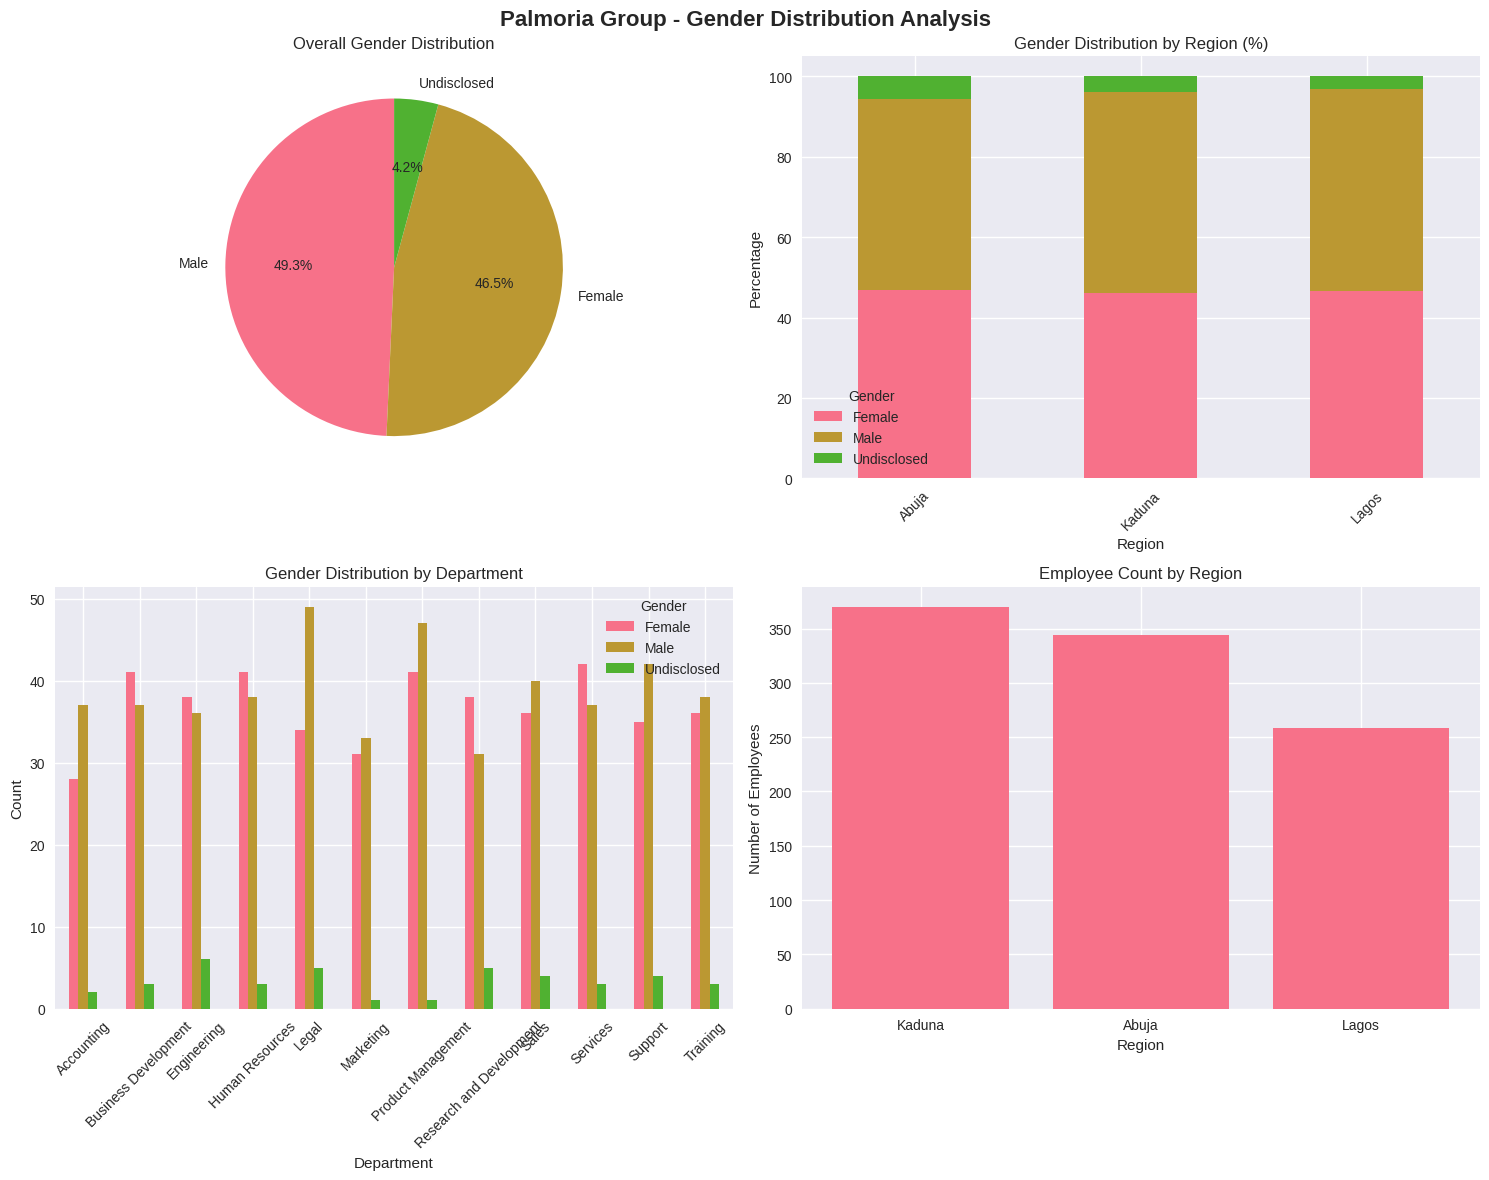

In [ ]:
# ================================
# STEP 5: VISUALIZATIONS FOR GENDER DISTRIBUTION
# ================================

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Palmoria Group - Gender Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Overall gender distribution pie chart
axes[0,0].pie(gender_dist.values, labels=gender_dist.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Overall Gender Distribution')

# 2. Gender by region stacked bar chart
gender_region_pct = pd.crosstab(df_cleaned['Location'], df_cleaned['Gender'], normalize='index') * 100
gender_region_pct.plot(kind='bar', stacked=True, ax=axes[0,1])
axes[0,1].set_title('Gender Distribution by Region (%)')
axes[0,1].set_xlabel('Region')
axes[0,1].set_ylabel('Percentage')
axes[0,1].legend(title='Gender')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Gender by department
dept_gender = df_cleaned.groupby(['Department', 'Gender']).size().unstack(fill_value=0)
dept_gender.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Gender Distribution by Department')
axes[1,0].set_xlabel('Department')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(title='Gender')

# 4. Regional employee count
region_count = df_cleaned['Location'].value_counts()
axes[1,1].bar(region_count.index, region_count.values)
axes[1,1].set_title('Employee Count by Region')
axes[1,1].set_xlabel('Region')
axes[1,1].set_ylabel('Number of Employees')

plt.tight_layout()
plt.show()

















In [ ]:
# ================================
# STEP 6: ANALYSIS 2 - PERFORMANCE RATINGS BY GENDER
# ================================

print("\n📊 ANALYSIS 2: PERFORMANCE RATINGS BY GENDER")
print("=" * 50)

# Rating distribution by gender
rating_gender = pd.crosstab(df_cleaned['Rating'], df_cleaned['Gender'], margins=True)
print("Rating Distribution by Gender:")
print(rating_gender)

# Percentage distribution
rating_gender_pct = pd.crosstab(df_cleaned['Rating'], df_cleaned['Gender'], normalize='columns') * 100
print("\nRating Distribution by Gender (%):")
print(rating_gender_pct.round(1))

# Statistical summary
print("\nRating Analysis Summary:")
rating_order = ['Very Poor', 'Poor', 'Average', 'Good', 'Very Good', 'Not Rated']
df_cleaned['Rating_Numeric'] = df_cleaned['Rating'].map({
    'Very Poor': 1, 'Poor': 2, 'Average': 3, 'Good': 4, 'Very Good': 5, 'Not Rated': np.nan
})

rating_stats = df_cleaned.groupby('Gender')['Rating_Numeric'].agg(['count', 'mean', 'std']).round(2)
print(rating_stats)


📊 ANALYSIS 2: PERFORMANCE RATINGS BY GENDER
Rating Distribution by Gender:
Gender     Female  Male  Undisclosed  All
Rating                                   
Average       197   221           19  437
Good           90    83            9  182
Not Rated      38    35            2   75
Poor           58    72            3  133
Very Good      49    37            5   91
Very Poor      20    31            3   54
All           452   479           41  972

Rating Distribution by Gender (%):
Gender     Female  Male  Undisclosed
Rating                              
Average      43.6  46.1         46.3
Good         19.9  17.3         22.0
Not Rated     8.4   7.3          4.9
Poor         12.8  15.0          7.3
Very Good    10.8   7.7         12.2
Very Poor     4.4   6.5          7.3

Rating Analysis Summary:
             count  mean   std
Gender                        
Female         414  3.22  0.99
Male           444  3.05  0.98
Undisclosed     39  3.26  1.04


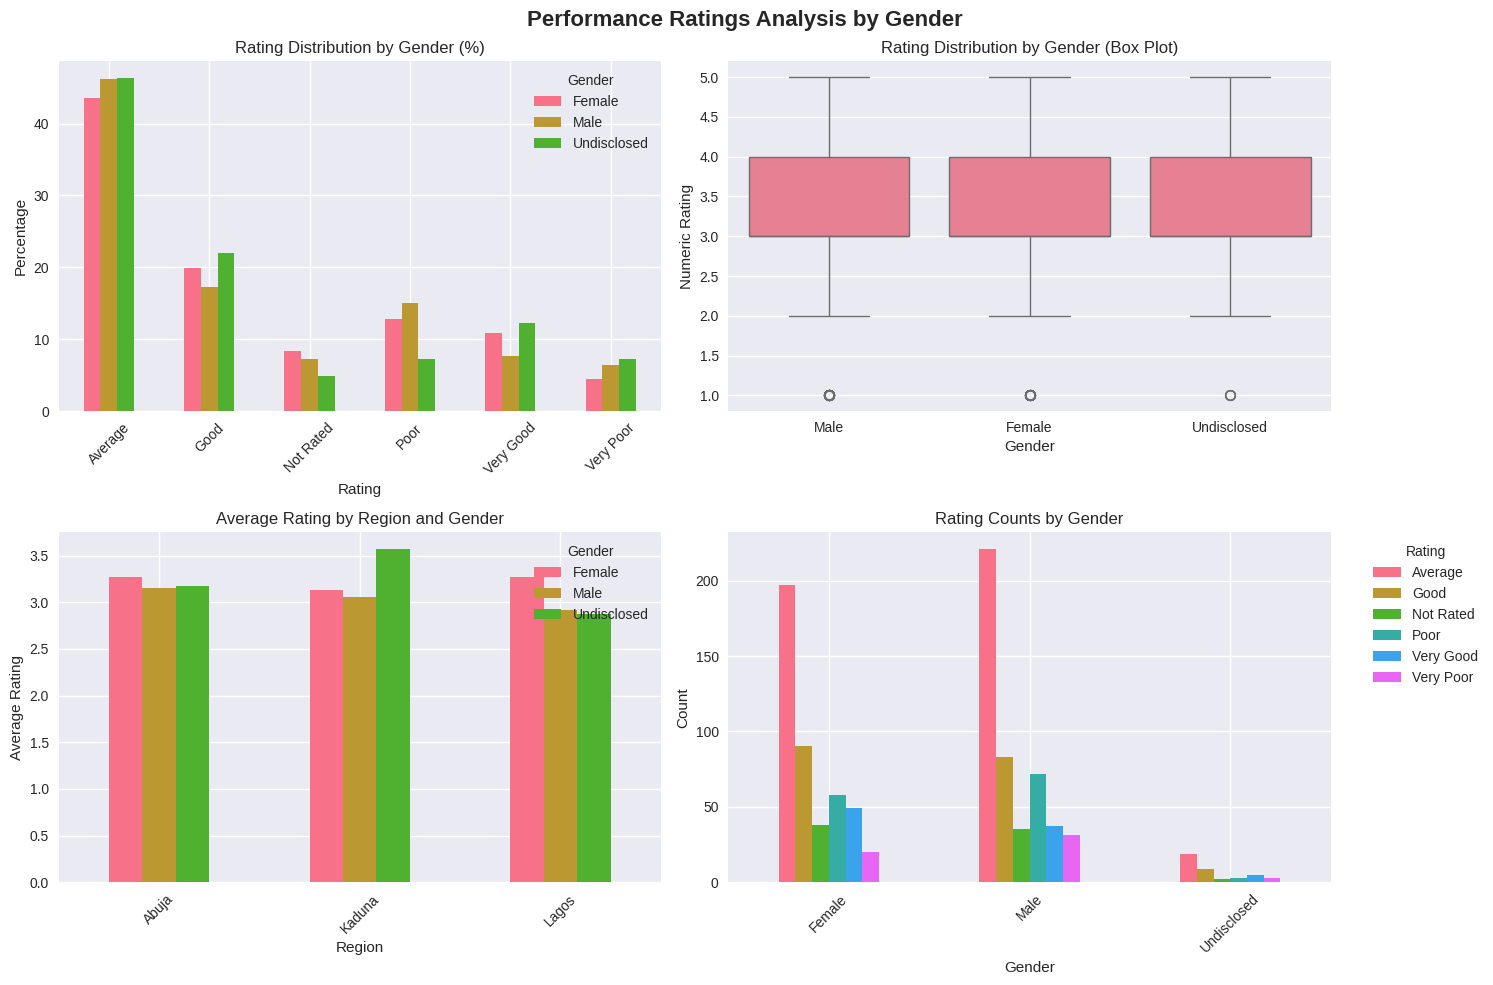

In [ ]:
# ================================
# STEP 7: VISUALIZATIONS FOR RATINGS ANALYSIS
# ================================

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Performance Ratings Analysis by Gender', fontsize=16, fontweight='bold')

# 1. Rating distribution by gender (stacked bar)
rating_gender_pct.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Rating Distribution by Gender (%)')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Percentage')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='Gender')

# 2. Box plot of numeric ratings by gender
df_ratings_clean = df_cleaned.dropna(subset=['Rating_Numeric'])
sns.boxplot(data=df_ratings_clean, x='Gender', y='Rating_Numeric', ax=axes[0,1])
axes[0,1].set_title('Rating Distribution by Gender (Box Plot)')
axes[0,1].set_ylabel('Numeric Rating')

# 3. Average rating by gender and region
avg_rating_region = df_cleaned.groupby(['Location', 'Gender'])['Rating_Numeric'].mean().unstack()
avg_rating_region.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Rating by Region and Gender')
axes[1,0].set_xlabel('Region')
axes[1,0].set_ylabel('Average Rating')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(title='Gender')

# 4. Rating counts by gender
rating_counts = df_cleaned.groupby('Gender')['Rating'].value_counts().unstack(fill_value=0)
rating_counts.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Rating Counts by Gender')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# ================================
# STEP 8: ANALYSIS 3 - SALARY STRUCTURE AND GENDER PAY GAP
# ================================

print("\n💰 ANALYSIS 3: SALARY STRUCTURE AND GENDER PAY GAP")
print("=" * 50)

# Overall salary statistics by gender
salary_stats = df_cleaned.groupby('Gender')['Salary'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2)
print("Salary Statistics by Gender:")
print(salary_stats)

# Calculate pay gap
male_avg = df_cleaned[df_cleaned['Gender'] == 'Male']['Salary'].mean()
female_avg = df_cleaned[df_cleaned['Gender'] == 'Female']['Salary'].mean()
pay_gap = ((male_avg - female_avg) / male_avg) * 100

print(f"\n🚨 GENDER PAY GAP ANALYSIS:")
print(f"Male average salary: ${male_avg:,.2f}")
print(f"Female average salary: ${female_avg:,.2f}")
print(f"Pay gap: {pay_gap:.1f}% (Female earning {100-pay_gap:.1f}% of male salary)")

# Salary analysis by department
print("\nSalary Analysis by Department and Gender:")
dept_salary = df_cleaned.groupby(['Department', 'Gender'])['Salary'].agg(['count', 'mean']).round(2)
print(dept_salary)

# Identify departments with significant pay gaps
print("\n🎯 DEPARTMENTS WITH SIGNIFICANT PAY GAPS:")
dept_gaps = []
for dept in df_cleaned['Department'].unique():
    dept_data = df_cleaned[df_cleaned['Department'] == dept]
    if len(dept_data[dept_data['Gender'] == 'Male']) > 0 and len(dept_data[dept_data['Gender'] == 'Female']) > 0:
        male_avg_dept = dept_data[dept_data['Gender'] == 'Male']['Salary'].mean()
        female_avg_dept = dept_data[dept_data['Gender'] == 'Female']['Salary'].mean()
        gap = ((male_avg_dept - female_avg_dept) / male_avg_dept) * 100
        dept_gaps.append({'Department': dept, 'Gap_%': gap, 'Male_Avg': male_avg_dept, 'Female_Avg': female_avg_dept})

dept_gaps_df = pd.DataFrame(dept_gaps).sort_values('Gap_%', ascending=False)
print(dept_gaps_df.round(2))

# Regional salary analysis
print("\nSalary Analysis by Region and Gender:")
region_salary = df_cleaned.groupby(['Location', 'Gender'])['Salary'].agg(['count', 'mean']).round(2)
print(region_salary)


💰 ANALYSIS 3: SALARY STRUCTURE AND GENDER PAY GAP
Salary Statistics by Gender:
             count      mean   median       std      min       max
Gender                                                            
Female         452  72115.75  72500.0  26836.01  28310.0  119930.0
Male           479  75123.90  74410.0  26705.00  28130.0  119670.0
Undisclosed     41  77470.00  74620.0  23737.96  34620.0  118800.0

🚨 GENDER PAY GAP ANALYSIS:
Male average salary: $75,123.90
Female average salary: $72,115.75
Pay gap: 4.0% (Female earning 96.0% of male salary)

Salary Analysis by Department and Gender:
                                      count       mean
Department               Gender                       
Accounting               Female          28   72938.93
                         Male            37   77530.00
                         Undisclosed      2  102560.00
Business Development     Female          41   74627.80
                         Male            37   82016.49
           

In [ ]:
# ================================
# STEP 9: ANALYSIS 4 - MINIMUM WAGE COMPLIANCE
# ================================

print("\n⚖️ ANALYSIS 4: MINIMUM WAGE COMPLIANCE ($90,000)")
print("=" * 50)

# Check compliance with $90,000 minimum wage
min_wage = 90000
below_min_wage = df_cleaned[df_cleaned['Salary'] < min_wage]
compliance_rate = ((len(df_cleaned) - len(below_min_wage)) / len(df_cleaned)) * 100

print(f"Minimum wage requirement: ${min_wage:,}")
print(f"Employees below minimum wage: {len(below_min_wage)} out of {len(df_cleaned)}")
print(f"Compliance rate: {compliance_rate:.1f}%")

if len(below_min_wage) > 0:
    print(f"🚨 Palmoria DOES NOT meet the minimum wage requirement!")
    print("\nEmployees below minimum wage by department:")
    print(below_min_wage['Department'].value_counts())
    print("\nEmployees below minimum wage by region:")
    print(below_min_wage['Location'].value_counts())
else:
    print("✅ Palmoria meets the minimum wage requirement!")


⚖️ ANALYSIS 4: MINIMUM WAGE COMPLIANCE ($90,000)
Minimum wage requirement: $90,000
Employees below minimum wage: 669 out of 972
Compliance rate: 31.2%
🚨 Palmoria DOES NOT meet the minimum wage requirement!

Employees below minimum wage by department:
Department
Product Management          65
Sales                       60
Human Resources             60
Research and Development    58
Legal                       57
Engineering                 57
Services                    56
Support                     53
Business Development        53
Training                    50
Marketing                   43
Accounting                  42
Name: count, dtype: int64

Employees below minimum wage by region:
Location
Kaduna    256
Abuja     241
Lagos     172
Name: count, dtype: int64


In [ ]:
# ================================
# STEP 10: SALARY BAND ANALYSIS
# ================================

print("\n📊 SALARY BAND ANALYSIS ($10,000 increments)")
print("=" * 50)

# Create salary bands
def create_salary_bands(salary):
    if pd.isna(salary):
        return 'Unknown'
    bands = [
        (0, 10000), (10000, 20000), (20000, 30000), (30000, 40000), (40000, 50000),
        (50000, 60000), (60000, 70000), (70000, 80000), (80000, 90000), (90000, 100000),
        (100000, 110000), (110000, 120000), (120000, float('inf'))
    ]

    for i, (lower, upper) in enumerate(bands):
        if lower <= salary < upper:
            if upper == float('inf'):
                return f'${lower//1000}K+'
            else:
                return f'${lower//1000}K-${upper//1000}K'
    return 'Unknown'

df_cleaned['Salary_Band'] = df_cleaned['Salary'].apply(create_salary_bands)

# Overall salary band distribution
salary_band_dist = df_cleaned['Salary_Band'].value_counts().sort_index()
print("Overall Salary Band Distribution:")
for band, count in salary_band_dist.items():
    pct = (count / len(df_cleaned)) * 100
    print(f"{band}: {count} employees ({pct:.1f}%)")

# Salary band by region
print("\nSalary Band Distribution by Region:")
salary_band_region = pd.crosstab(df_cleaned['Location'], df_cleaned['Salary_Band'])
print(salary_band_region)


📊 SALARY BAND ANALYSIS ($10,000 increments)
Overall Salary Band Distribution:
$100K-$110K: 108 employees (11.1%)
$110K-$120K: 103 employees (10.6%)
$20K-$30K: 26 employees (2.7%)
$30K-$40K: 106 employees (10.9%)
$40K-$50K: 109 employees (11.2%)
$50K-$60K: 99 employees (10.2%)
$60K-$70K: 100 employees (10.3%)
$70K-$80K: 118 employees (12.1%)
$80K-$90K: 111 employees (11.4%)
$90K-$100K: 92 employees (9.5%)

Salary Band Distribution by Region:
Salary_Band  $100K-$110K  $110K-$120K  $20K-$30K  $30K-$40K  $40K-$50K  \
Location                                                                 
Abuja                 41           31          9         37         47   
Kaduna                42           40         11         42         33   
Lagos                 25           32          6         27         29   

Salary_Band  $50K-$60K  $60K-$70K  $70K-$80K  $80K-$90K  $90K-$100K  
Location                                                             
Abuja               37         37         3

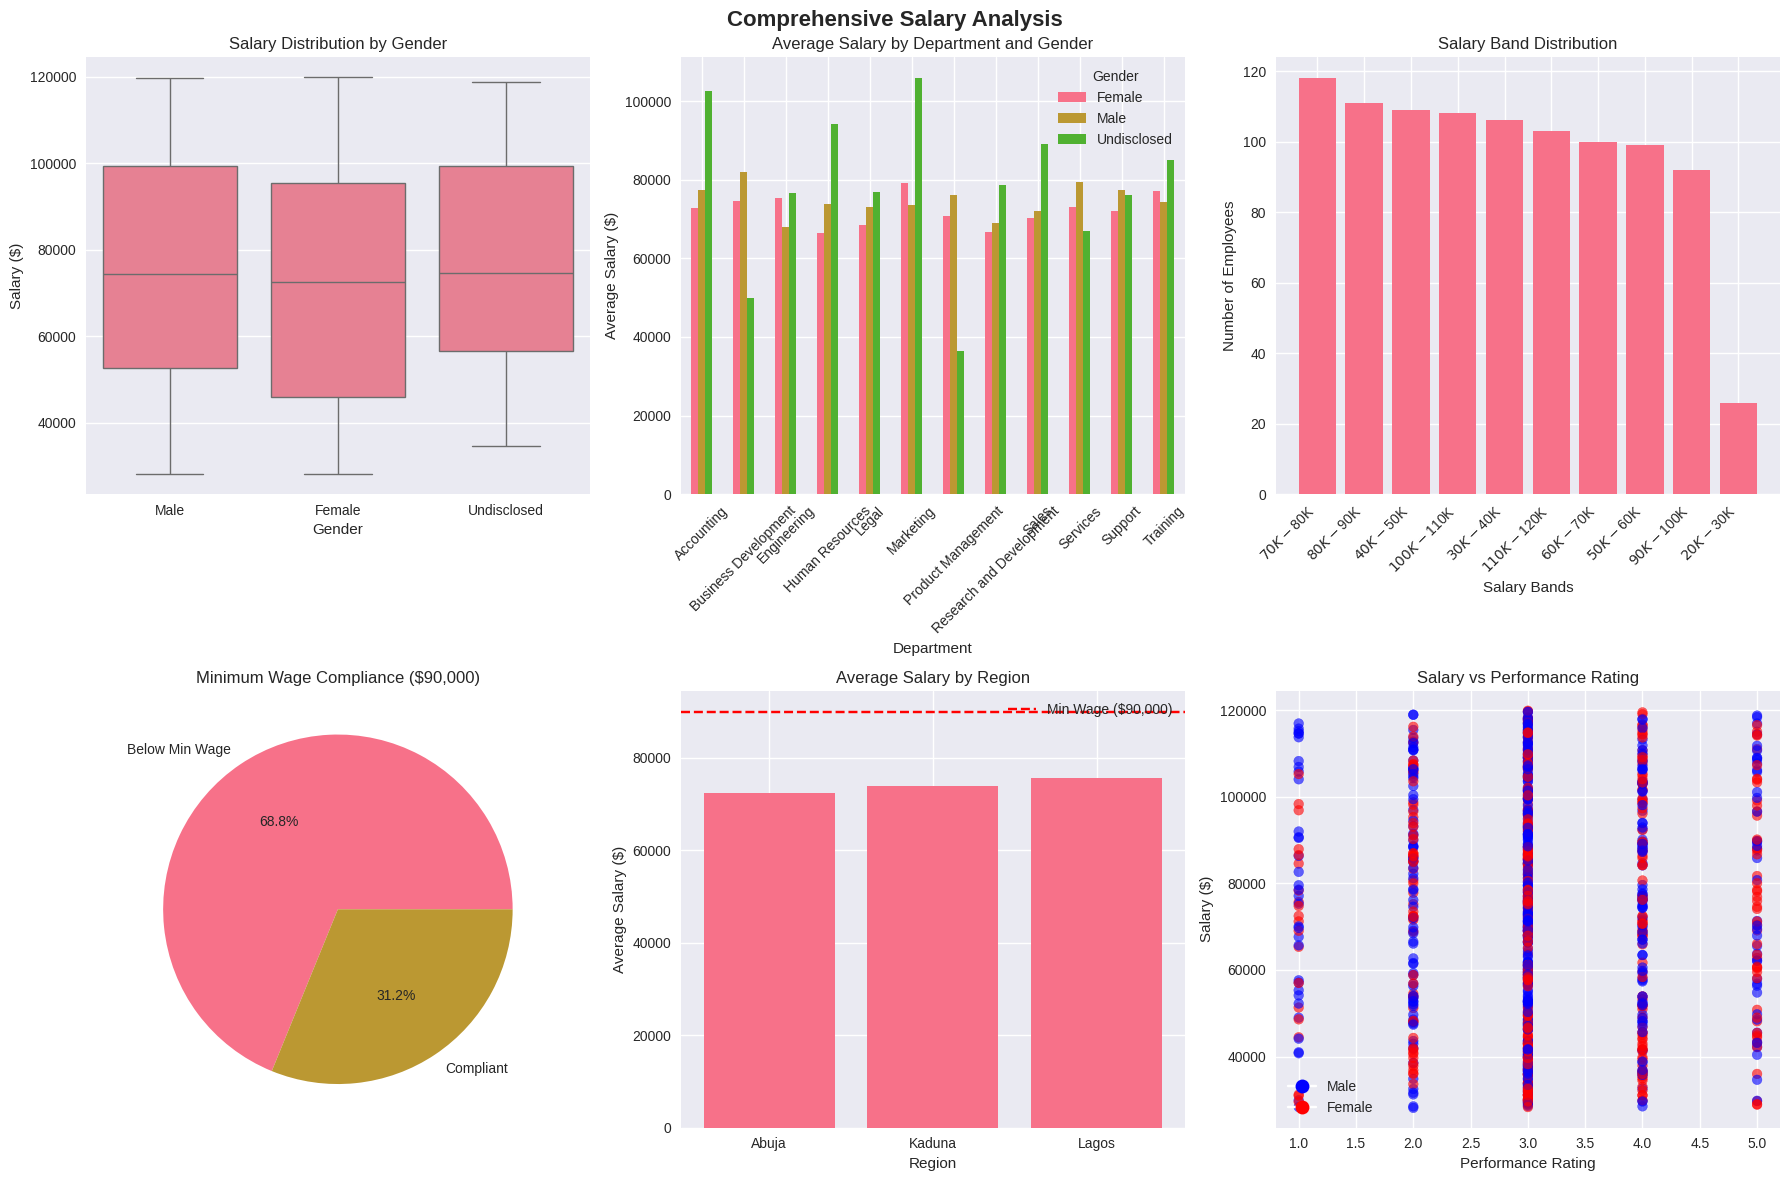

In [ ]:
# ================================
# STEP 11: COMPREHENSIVE SALARY VISUALIZATIONS
# ================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comprehensive Salary Analysis', fontsize=16, fontweight='bold')

# 1. Salary distribution by gender
sns.boxplot(data=df_cleaned, x='Gender', y='Salary', ax=axes[0,0])
axes[0,0].set_title('Salary Distribution by Gender')
axes[0,0].set_ylabel('Salary ($)')

# 2. Average salary by department and gender
dept_gender_salary = df_cleaned.groupby(['Department', 'Gender'])['Salary'].mean().unstack()
dept_gender_salary.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Average Salary by Department and Gender')
axes[0,1].set_ylabel('Average Salary ($)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Gender')

# 3. Salary band distribution
salary_band_counts = df_cleaned['Salary_Band'].value_counts()
axes[0,2].bar(range(len(salary_band_counts)), salary_band_counts.values)
axes[0,2].set_title('Salary Band Distribution')
axes[0,2].set_xlabel('Salary Bands')
axes[0,2].set_ylabel('Number of Employees')
axes[0,2].set_xticks(range(len(salary_band_counts)))
axes[0,2].set_xticklabels(salary_band_counts.index, rotation=45, ha='right')

# 4. Below minimum wage analysis
compliance_data = ['Compliant' if sal >= min_wage else 'Below Min Wage' for sal in df_cleaned['Salary']]
compliance_counts = pd.Series(compliance_data).value_counts()
axes[1,0].pie(compliance_counts.values, labels=compliance_counts.index, autopct='%1.1f%%')
axes[1,0].set_title(f'Minimum Wage Compliance (${min_wage:,})')

# 5. Regional salary comparison
region_salary_avg = df_cleaned.groupby('Location')['Salary'].mean()
axes[1,1].bar(region_salary_avg.index, region_salary_avg.values)
axes[1,1].set_title('Average Salary by Region')
axes[1,1].set_xlabel('Region')
axes[1,1].set_ylabel('Average Salary ($)')
axes[1,1].axhline(y=min_wage, color='red', linestyle='--', label=f'Min Wage (${min_wage:,})')
axes[1,1].legend()

# 6. Salary vs Rating scatter plot
df_numeric_rating = df_cleaned.dropna(subset=['Rating_Numeric'])
scatter_colors = ['red' if g == 'Female' else 'blue' for g in df_numeric_rating['Gender']]
axes[1,2].scatter(df_numeric_rating['Rating_Numeric'], df_numeric_rating['Salary'],
                 c=scatter_colors, alpha=0.6)
axes[1,2].set_title('Salary vs Performance Rating')
axes[1,2].set_xlabel('Performance Rating')
axes[1,2].set_ylabel('Salary ($)')
# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Male'),
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Female')]
axes[1,2].legend(handles=legend_elements)

plt.tight_layout()
plt.show()

In [ ]:
# ================================
# STEP 12: EXECUTIVE SUMMARY AND RECOMMENDATIONS
# ================================

print("\n📋 EXECUTIVE SUMMARY - KEY FINDINGS")
print("=" * 50)

print("🎯 KEY INSIGHTS FOR PALMORIA MANAGEMENT:")
print("\n1. GENDER REPRESENTATION:")
male_pct = (df_cleaned['Gender'].value_counts()['Male'] / len(df_cleaned)) * 100
female_pct = (df_cleaned['Gender'].value_counts()['Female'] / len(df_cleaned)) * 100
print(f"   - Male: {male_pct:.1f}%, Female: {female_pct:.1f}%")

print(f"\n2. GENDER PAY GAP:")
print(f"   - Overall pay gap: {pay_gap:.1f}%")
print(f"   - Female employees earn {100-pay_gap:.1f}% of male salary on average")

print(f"\n3. MINIMUM WAGE COMPLIANCE:")
print(f"   - Compliance rate: {compliance_rate:.1f}%")
print(f"   - {len(below_min_wage)} employees below ${min_wage:,} threshold")

print(f"\n4. DEPARTMENTS REQUIRING ATTENTION:")
top_gap_depts = dept_gaps_df.head(3)
for _, row in top_gap_depts.iterrows():
    print(f"   - {row['Department']}: {row['Gap_%']:.1f}% pay gap")

print(f"\n5. PERFORMANCE RATINGS:")
avg_male_rating = df_cleaned[df_cleaned['Gender'] == 'Male']['Rating_Numeric'].mean()
avg_female_rating = df_cleaned[df_cleaned['Gender'] == 'Female']['Rating_Numeric'].mean()
print(f"   - Average male rating: {avg_male_rating:.2f}")
print(f"   - Average female rating: {avg_female_rating:.2f}")

print("\n🚨 URGENT RECOMMENDATIONS:")
print("1. Immediate salary review for employees below $90,000 minimum wage")
print("2. Department-specific pay equity audits, focusing on highest gap departments")
print("3. Standardize compensation frameworks across all regions")
print("4. Implement transparent performance evaluation processes")
print("5. Regular gender pay gap monitoring and reporting")

print("\n✅ Analysis Complete! All visualizations and insights have been generated.")
print("📊 Data is ready for management presentation and action planning.")


📋 EXECUTIVE SUMMARY - KEY FINDINGS
🎯 KEY INSIGHTS FOR PALMORIA MANAGEMENT:

1. GENDER REPRESENTATION:
   - Male: 49.3%, Female: 46.5%

2. GENDER PAY GAP:
   - Overall pay gap: 4.0%
   - Female employees earn 96.0% of male salary on average

3. MINIMUM WAGE COMPLIANCE:
   - Compliance rate: 31.2%
   - 669 employees below $90,000 threshold

4. DEPARTMENTS REQUIRING ATTENTION:
   - Human Resources: 9.8% pay gap
   - Business Development: 9.0% pay gap
   - Services: 8.0% pay gap

5. PERFORMANCE RATINGS:
   - Average male rating: 3.05
   - Average female rating: 3.22

🚨 URGENT RECOMMENDATIONS:
1. Immediate salary review for employees below $90,000 minimum wage
2. Department-specific pay equity audits, focusing on highest gap departments
3. Standardize compensation frameworks across all regions
4. Implement transparent performance evaluation processes
5. Regular gender pay gap monitoring and reporting

✅ Analysis Complete! All visualizations and insights have been generated.
📊 Data is ready

In [ ]:
# ================================
# BONUS: SAVE RESULTS FOR REPORTING
# ================================

# Save key findings to CSV files for easy sharing
salary_summary = df_cleaned.groupby(['Gender', 'Location', 'Department'])['Salary'].agg(['count', 'mean', 'median']).round(2)
salary_summary.to_csv('palmoria_salary_analysis.csv')

compliance_details = below_min_wage[['Name', 'Gender', 'Department', 'Salary', 'Location']].copy()
compliance_details.to_csv('employees_below_minimum_wage.csv', index=False)

dept_gaps_df.to_csv('department_pay_gaps.csv', index=False)

print("\n💾 Analysis results saved to CSV files:")
print("   - palmoria_salary_analysis.csv")
print("   - employees_below_minimum_wage.csv")
print("   - department_pay_gaps.csv")


💾 Analysis results saved to CSV files:
   - palmoria_salary_analysis.csv
   - employees_below_minimum_wage.csv
   - department_pay_gaps.csv
